In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
from theano import shared

In [ ]:


b = shared(np.array([100, 120, 150, 200, 1000, 10000, 15000]))
s = np.array([1, 0, 1, 1, 0, 0, 0])
#s = pd.Categorical(s).codes
#print(s)

with pm.Model() as model:
    l1 = pm.HalfNormal('l1', sd=100)
    drift = tt.exp(b.dot(-l1))
    sd = pm.HalfNormal('sd', sd=1, shape=7)
    p1 = pm.Beta('p1', drift, sd, shape=7)
    obs = pm.Bernoulli('obs', p=p1, observed=s)

In [ ]:
with model:
    trace = pm.sample(100)
    pm.sample_ppc(trace, 1000)


In [ ]:
fig, ax = plt.plot(figsize=(8,6))
ax.plot()

### Discrete Dirichlet Poisson distribution


In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
from theano import shared

In [23]:
data=[23, 42, 29, 98, 1,1,1, 3, 43, 40, 40, 40, 40, 56, 78,1,7, 197, 198, 192, 107]
K = 10
with pm.Model() as model:
    lam = pm.Uniform('lam', lower=np.min(data)-1, upper=np.max(data)+1, shape=K)
    alpha = pm.Gamma('alpha',1., 1., shape=K)

    #mixture components
    components = pm.NegativeBinomial.dist(mu=lam, alpha=alpha, shape=K)
    #components = pm.Poisson.dist(mu=lam, shape=K)
    
    #mixture component weights
    w = pm.Dirichlet('w', a=np.array([1]*K)) 
    
    like = pm.Mixture('like', w=w, comp_dists=components, observed=data)


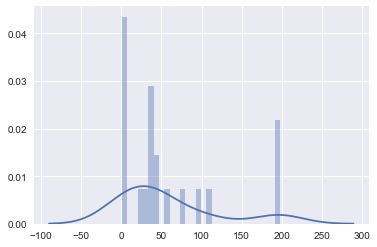

In [24]:
import seaborn as sns
sns.distplot(data, bins=30)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,074.6: 100%|██████████| 10000/10000 [00:01<00:00, 5086.67it/s]
Finished [100%]: Average ELBO = -1,075.1
100%|██████████| 100/100 [00:00<00:00, 196.77it/s]


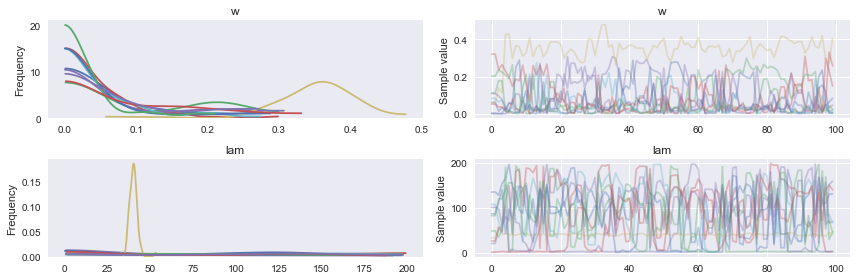

In [25]:
with model:
    trace = pm.sample(100, n_init=10000)
    ppc = pm.sample_ppc(trace, 100)
    pm.traceplot(trace, varnames=['w', 'lam'])

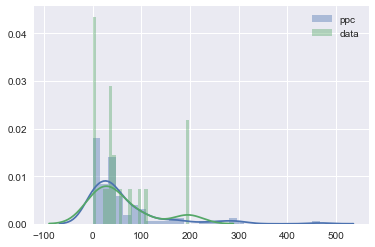

In [26]:
sns.distplot(ppc['like'], bins=30,label='ppc')
sns.distplot(data, bins=30,label='data')
plt.legend(loc=1)

In [16]:
import scipy.stats as sp
